In [1]:
import IPython.display as ipd

# Download Videos

# Steph
- https://www.youtube.com/watch?v=oJE9mhwO058

In [8]:
from pytube import YouTube
import os
import shutil

def pull_video(video_id, save_dir):
    out_fn = f"{save_dir}/{video_id}.mp4"
    if os.path.exists(out_fn):
        return

    stream = YouTube(
        f"http://www.youtube.com/watch?v={video_id}"
    ).streams.get_highest_resolution()
    stream.download()
    fn = stream.default_filename
    shutil.move(fn, out_fn)

In [12]:
pull_video('Q_8_7gorEug','./')

## Slice Video

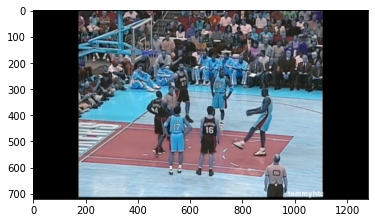

In [80]:
import cv2

import matplotlib.pyplot as plt

video = 'Q_8_7gorEug.mp4'
cap = cv2.VideoCapture(video)

start_frame = 271 # int(30 * 9.05)
end_frame = 414
for frame in range(end_frame):
    res, img  = cap.read()
    if frame < start_frame:
        continue
    else:
        cv2.imwrite(f'shaq/{frame}.png', img[200:600,700:1100,:])
cap.release()
plt.imshow(img)

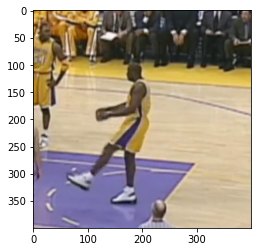

In [78]:
plt.imshow(cv2.cvtColor(img[200:600,700:1100,:], cv2.COLOR_BGR2RGB))

In [4]:
import os
import matplotlib.pyplot as plt

In [11]:
import cv2

import matplotlib.pyplot as plt

video = 'steph.mp4'
cap = cv2.VideoCapture(video)

start_frame = 0 # int(30 * 9.05)
end_frame = 990
for frame in range(end_frame):
    res, img  = cap.read()
    if res == False:
        break
    if frame < start_frame:
        continue
    else:
        cv2.imwrite(f'steph/{frame:03}.png', img[300:800,1200:1500,:])
cap.release()
# plt.imshow(img)

In [13]:
# plt.imshow(cv2.cvtColor(img[300:800,1200:1500,:], cv2.COLOR_BGR2RGB))

# Media Pose

In [19]:
import cv2
import mediapipe as mp
import numpy as np
from glob import glob
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose


In [20]:
# cv2.imshow('test', annotated_image)

In [21]:
# import matplotlib.pyplot as plt
# plt.imshow(annotated_image)

In [22]:
# For static images:
IMAGE_FILES = []
IMAGE_FILES = glob('shaq/*.png')
IMAGE_FILES = np.sort(IMAGE_FILES)
BG_COLOR = (192, 192, 192) # gray
annotated_images = []
with mp_pose.Pose(
    static_image_mode=True,
    model_complexity=2,
    enable_segmentation=True,
    min_detection_confidence=0.5) as pose:
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    image_height, image_width, _ = image.shape
    # Convert the BGR image to RGB before processing.
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    if not results.pose_landmarks:
      print(f'frame {idx}')
      continue
    print(
        f'Nose coordinates: ('
        f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width}, '
        f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_height})'
    )

    annotated_image = image.copy()
    # Draw segmentation on the image.
    # To improve segmentation around boundaries, consider applying a joint
    # bilateral filter to "results.segmentation_mask" with "image".
    condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
    bg_image = np.zeros(image.shape, dtype=np.uint8)
    bg_image[:] = BG_COLOR
    annotated_image = np.where(condition, annotated_image, bg_image)
    # Draw pose landmarks on the image.
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    cv2.imshow('media',annotated_image)
    annotated_images.append(annotated_image)
    # cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', annotated_image)
    # Plot pose world landmarks.
    # mp_drawing.plot_landmarks(
    #     results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)


Nose coordinates: (243.52598190307617, 130.04469871520996)
Nose coordinates: (240.86756706237793, 127.9649019241333)
Nose coordinates: (239.7810935974121, 125.2471923828125)
Nose coordinates: (239.857816696167, 126.89642906188965)
Nose coordinates: (241.6203737258911, 128.73146533966064)
Nose coordinates: (243.44685077667236, 123.91519546508789)
Nose coordinates: (246.4895725250244, 124.62174892425537)
Nose coordinates: (245.33774852752686, 122.33539819717407)
Nose coordinates: (246.45707607269287, 121.99695110321045)
Nose coordinates: (247.82781600952148, 124.86754655838013)
Nose coordinates: (245.8707571029663, 122.52087593078613)
frame 11
frame 12
frame 13
frame 14
frame 15
frame 16
frame 17
frame 18
frame 19
Nose coordinates: (245.38373947143555, 122.73581027984619)
Nose coordinates: (246.64554595947266, 124.7258186340332)
frame 22
frame 23
frame 24
frame 25
frame 26
frame 27
frame 28
frame 29
frame 30
Nose coordinates: (221.52462005615234, 355.71601390838623)
Nose coordinates: (22

## Databasics: CamelCaseOrGoHome
## camelCaseOrGoHome

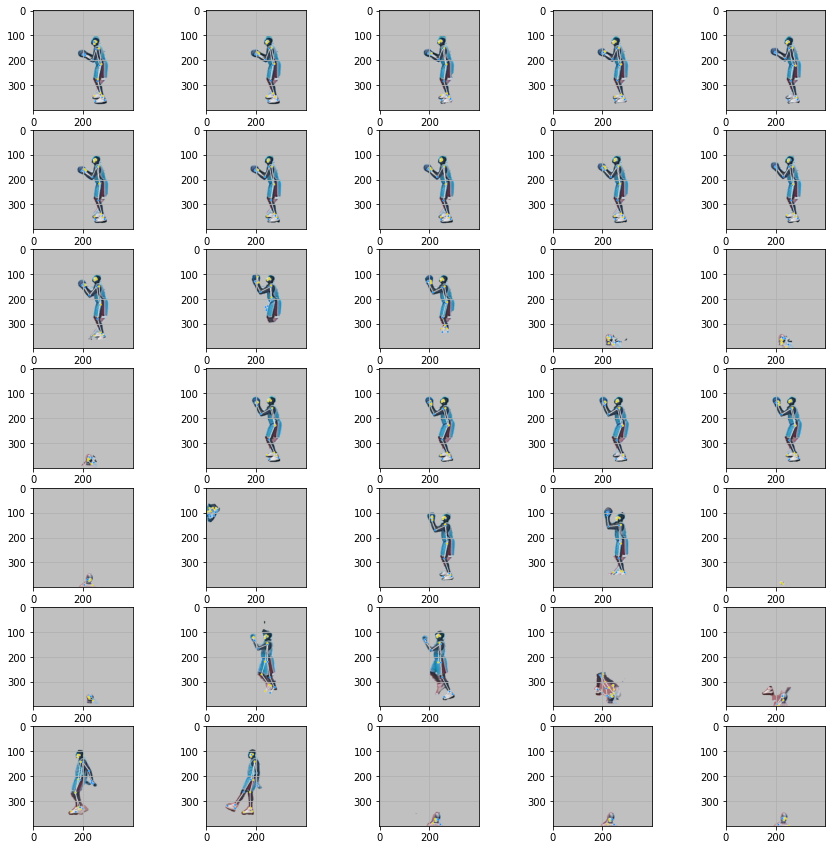

In [24]:
fig, axs = plt.subplots(7, 5, figsize=(15, 15))
axs = axs.flatten()
for idx in range(35):
    axs[idx].imshow(annotated_images[idx])
    axs[idx].grid('None')
# axs[1].imshow(annotated_images[15])
# axs[2].imshow(annotated_images[32])

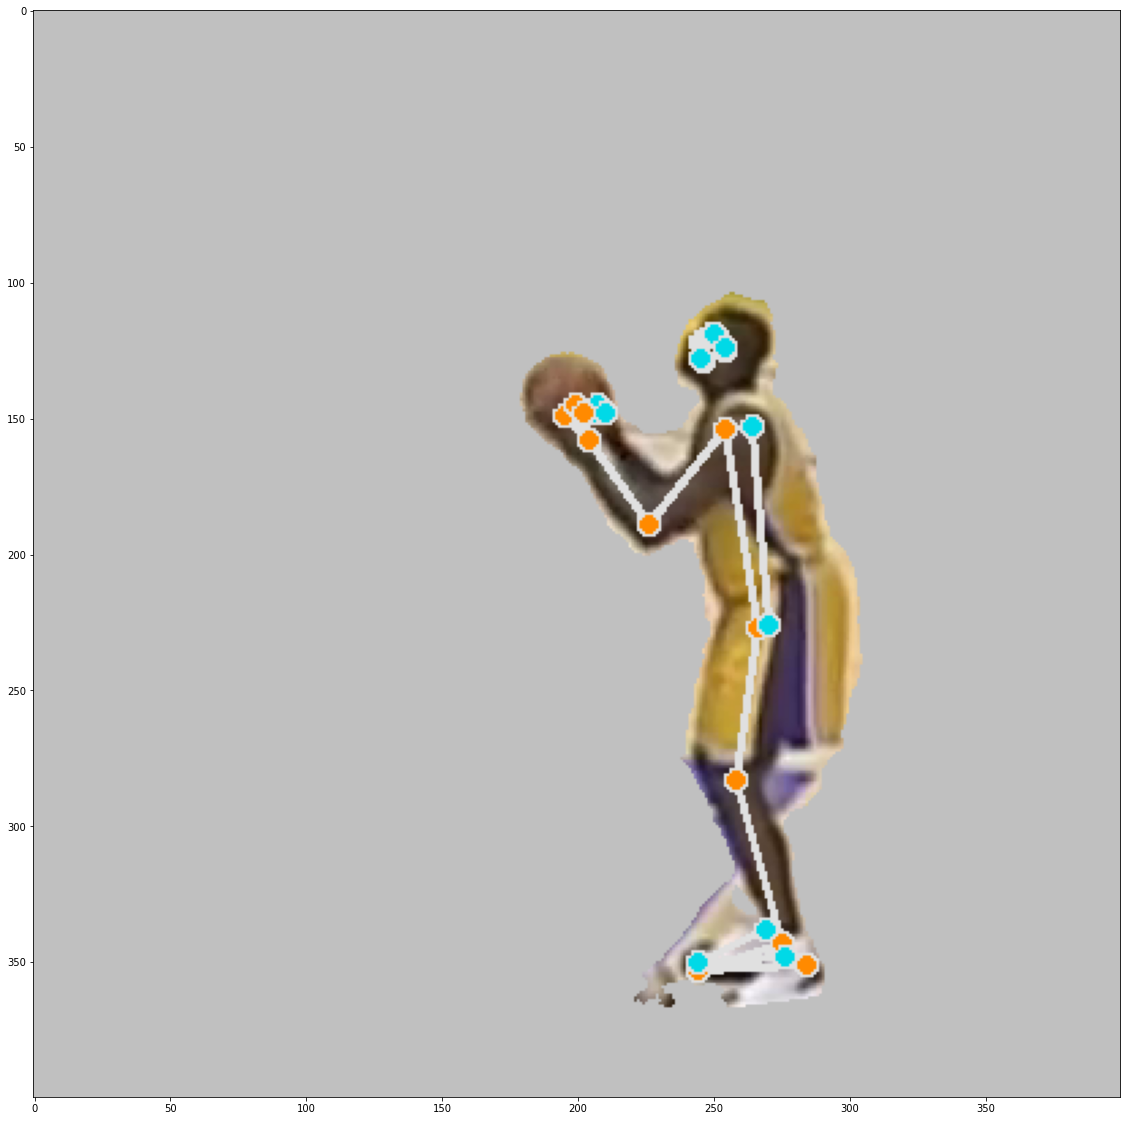

In [26]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.imshow(cv2.cvtColor(annotated_images[10], cv2.COLOR_BGR2RGB))

# Run Pose on Steph

In [5]:
import cv2
import mediapipe as mp
import numpy as np
from glob import glob
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose


# For static images:
IMAGE_FILES = []
IMAGE_FILES = glob('steph/*.png')
IMAGE_FILES = np.sort(IMAGE_FILES)
BG_COLOR = (192, 192, 192) # gray
annotated_images = []
with mp_pose.Pose(
    static_image_mode=True,
    model_complexity=2,
    enable_segmentation=True,
    min_detection_confidence=0.5) as pose:
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    image_height, image_width, _ = image.shape
    # Convert the BGR image to RGB before processing.
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    if not results.pose_landmarks:
      print(f'frame {idx}')
      continue
    print(
        f'Nose coordinates: ('
        f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width}, '
        f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_height})'
    )

    annotated_image = image.copy()
    # Draw segmentation on the image.
    # To improve segmentation around boundaries, consider applying a joint
    # bilateral filter to "results.segmentation_mask" with "image".
    condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
    bg_image = np.zeros(image.shape, dtype=np.uint8)
    bg_image[:] = BG_COLOR
    annotated_image = np.where(condition, annotated_image, bg_image)
    # Draw pose landmarks on the image.
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    # cv2.imshow('media',annotated_image)
    annotated_images.append(annotated_image)
    cv2.imwrite('./steph/annotated_images/annot' + str(idx) + '.png', annotated_image)
    # Plot pose world landmarks.
    # mp_drawing.plot_landmarks(
    #     results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)


Nose coordinates: (161.16535663604736, 173.01195859909058)
Nose coordinates: (159.79658961296082, 169.8976308107376)
Nose coordinates: (158.63322615623474, 168.60324144363403)
Nose coordinates: (156.4760148525238, 164.44790363311768)
Nose coordinates: (156.30188584327698, 159.39413011074066)
Nose coordinates: (157.14011192321777, 156.87313675880432)
Nose coordinates: (156.4842402935028, 152.549609541893)
Nose coordinates: (156.75508975982666, 150.28992295265198)
Nose coordinates: (157.89583325386047, 148.0737328529358)
Nose coordinates: (158.11341404914856, 144.38417553901672)
Nose coordinates: (158.28001499176025, 141.95489883422852)
Nose coordinates: (158.30894708633423, 140.81108570098877)
Nose coordinates: (159.0513825416565, 139.35759663581848)
Nose coordinates: (159.06845927238464, 138.86752724647522)
Nose coordinates: (158.2304835319519, 138.28805088996887)
Nose coordinates: (158.24115872383118, 138.97979259490967)
Nose coordinates: (156.7838966846466, 136.98267936706543)
Nose c

In [8]:
# len(annotated_images)

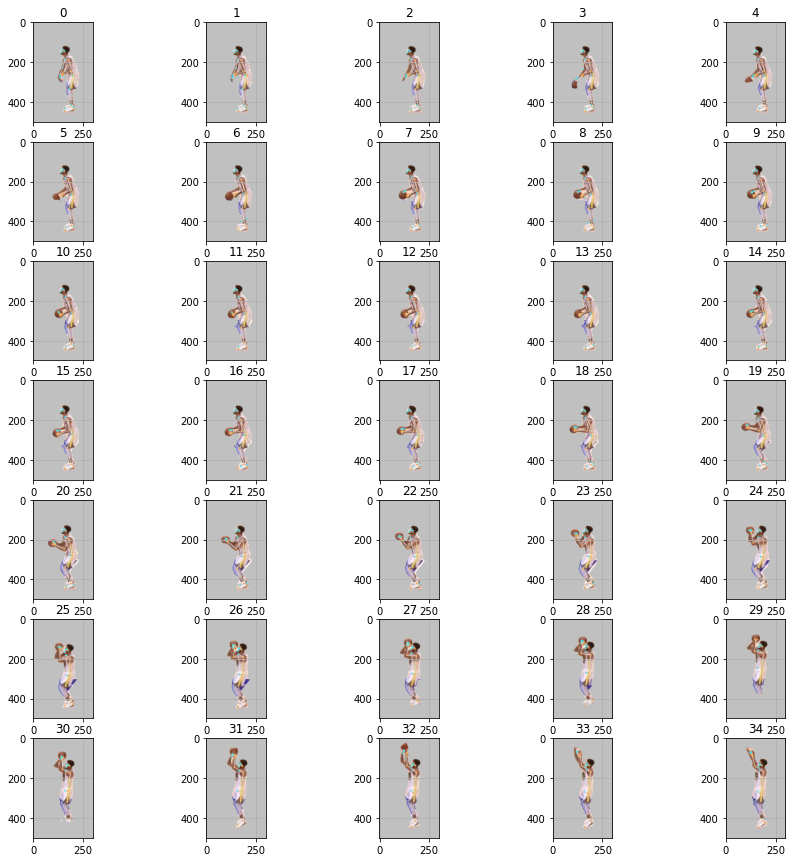

In [11]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(7, 5, figsize=(15, 15))
axs = axs.flatten()
for idx in range(35):
    axs[idx].imshow(cv2.cvtColor(annotated_images[idx+60], cv2.COLOR_BGR2RGB))
    axs[idx].grid('None')
    axs[idx].set_title(idx)
# axs[1].imshow(annotated_images[15])
# axs[2].imshow(annotated_images[32])

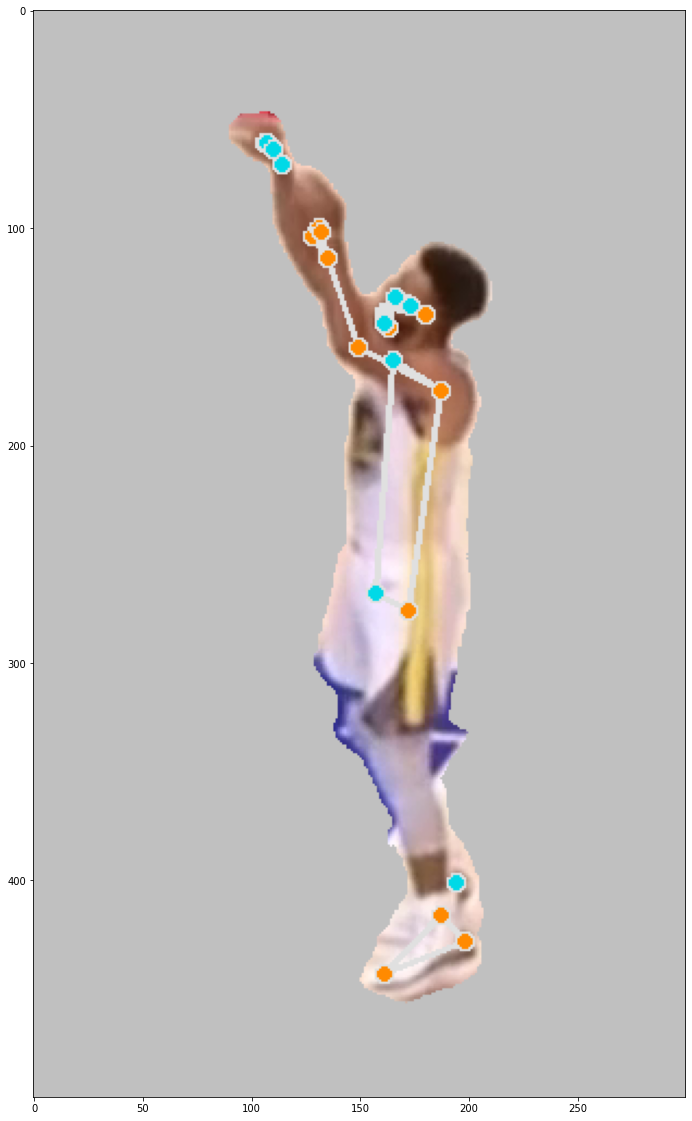

In [18]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.imshow(cv2.cvtColor(annotated_images[100], cv2.COLOR_BGR2RGB))

# Pose Packages
- Mediapipe
- OpenPose
- alphapose